## Udacity Machine Learning Engineer Nanodegree - Tareq Mufaddi Capstone Report ##

## Data Exploration:##

In [13]:
# Importing libraries

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation, metrics
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize

In [4]:
# Importing Santander's customer satisfaction training and test sets 

train = pd.read_csv("C:/Users/Tareq Mufaddi/Udacity Capstone/Dataset/train.csv")
test = pd.read_csv("C:/Users/Tareq Mufaddi/Udacity Capstone/Dataset/test.csv")
train_ID = train['ID']
train.drop('ID', inplace=True, axis=1)
test_ID = test['ID']
test.drop('ID', inplace=True, axis=1)

In [5]:
# Identify and drop features with 1 unique element only

def unique_features(input):
    unique_in_input = input.apply(pd.Series.nunique).sort_values(ascending=False)
    uni_features = unique_in_input[unique_in_input == 1].index.tolist()
    return uni_features

unique_in_train = unique_features(train)
print('The training set has {} features with 1 unique element, those features will be dropped.'.format(len(unique_in_train)))
train.drop(unique_in_train, inplace = True, axis = 1)
test.drop(unique_in_train, inplace = True, axis = 1)

# Identify and drop duplicate features: 

def duplicate_features(input):
    duplicate_in_input = []
    columns = train.columns
    for x in range(len(columns)-1):
        value = train[columns[x]].values
        for y in range(x+1, len(columns)):
            if np.array_equal(value,train[columns[y]].values):
                duplicate_in_input.append(columns[y])
    return duplicate_in_input

duplicate_in_train = duplicate_features(train)
print('The training set has {} features with duplicate elements, those features will be dropped.'.format(len(duplicate_in_train)))
train.drop(duplicate_in_train, inplace = True, axis = 1)   
test.drop(duplicate_in_train, inplace = True, axis = 1)   

# Check for NA values in the training set:

x  = train.isnull().values.any()
print ('NAN values in dataset: {}.'.format(x))

The training set has 34 features with 1 unique element, those features will be dropped.
The training set has 29 features with duplicate elements, those features will be dropped.
NAN values in dataset: False.


## Data Preprocessing:##

In [7]:
X = train.iloc[:,:-1]
y = train.TARGET

In [9]:
# The XGB Classifier which will be used for feature selection, 
# rationale behind selected parameters explained in the final report. 

clf_FS = XGBClassifier(
 learning_rate = 0.01,
 n_estimators = 1100,
 max_depth = 5,
 gamma = 0,
 min_child_weight=2,
 colsample_bytree=0.8,
 subsample=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=0)

clf_FS.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=1100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [45]:
# Cross-validation AUC score of the top 50 features only:

top_features = feat_imp.iloc[0:50,:]
X_test = X[top_features.index]
cv_score = cross_validation.cross_val_score(clf_FS, X_test, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.84042666998300231

In [28]:
# Cross-validation AUC score of the top 52 features only:

top_features = feat_imp.iloc[0:52,:]
X_test = X[top_features.index]
cv_score = cross_validation.cross_val_score(clf_FS, X_test, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.84044530992902144

In [42]:
# Cross-validation AUC score of the top 55 features only:

top_features = feat_imp.iloc[0:55,:]
X_test = X[top_features.index]
cv_score = cross_validation.cross_val_score(clf_FS, X_test, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.84055469653981396

In [22]:
# Cross-validation AUC score of the top 60 features only:

top_features = feat_imp.iloc[0:60,:]
X_test = X[top_features.index]
cv_score = cross_validation.cross_val_score(clf_FS, X_test, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.84041962158506156

In [47]:
# Selecting the top 55 features: 

feat_imp = clf_FS.feature_importances_
feat_imp = pd.DataFrame(feat_imp, index=X.columns).sort_values(0, ascending=False)
top_features = feat_imp.iloc[0:55,:]
X_imp = X[top_features.index]

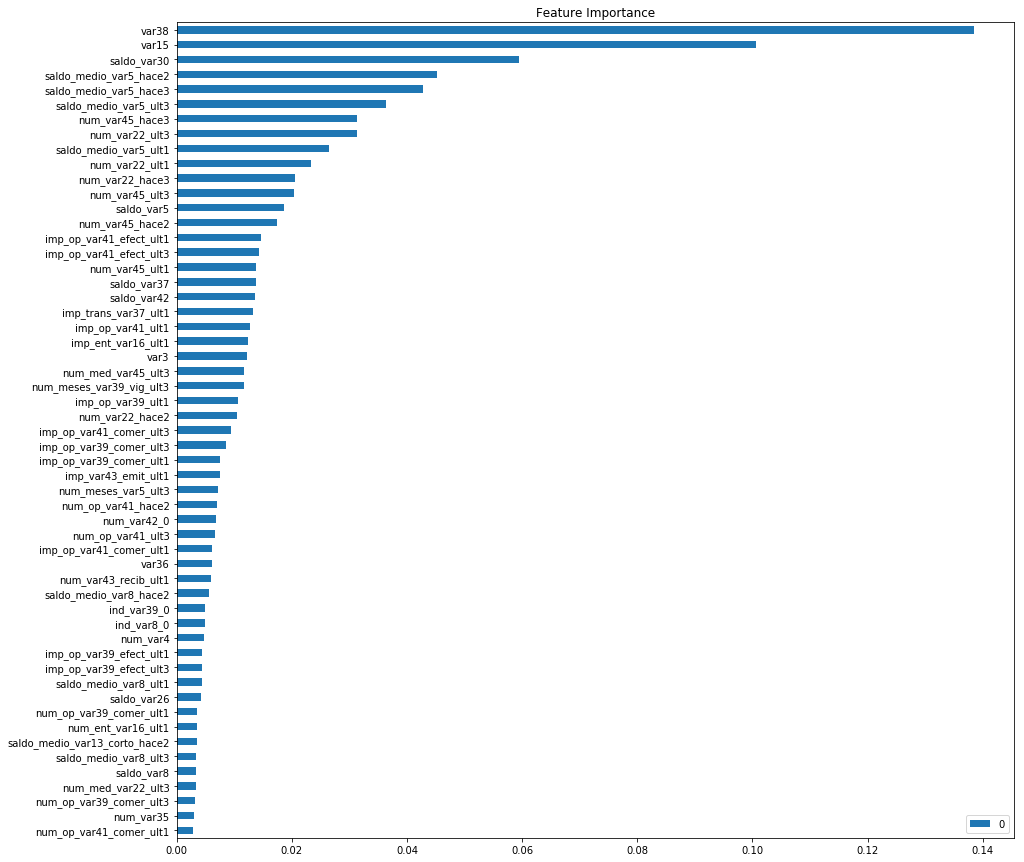

In [36]:
# Top 55 features plot:

top_features.sort_values(0, ascending=True).plot.barh(title='Feature Importance', figsize=(15,15))

In [48]:
# Top 6 features training set used for further visual examination:

X_analysis = X_imp.iloc[:,0:6]

In [53]:
# Statistical description of the training dataset (top 6 features):

X_analysis.describe()

,var38,var15,saldo_var30,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult3
count,7.602000e+04,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000
mean,1.172358e+05,33.212865,1.367967e+04,1579.135311,8.913659e+02,1048.856447
std,1.826646e+05,12.956486,6.301408e+04,12148.452398,9.888597e+03,8189.948852
min,5.163750e+03,5.000000,-4.942260e+03,-128.370000,-8.040000e+00,-476.070000
25%,6.787061e+04,23.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,1.064092e+05,28.000000,3.000000e+00,3.000000,9.900000e-01,2.730000
75%,1.187563e+05,40.000000,2.359950e+02,90.000000,1.221750e+01,83.790000
max,2.203474e+07,105.000000,3.458077e+06,812137.260000,1.542339e+06,544365.570000


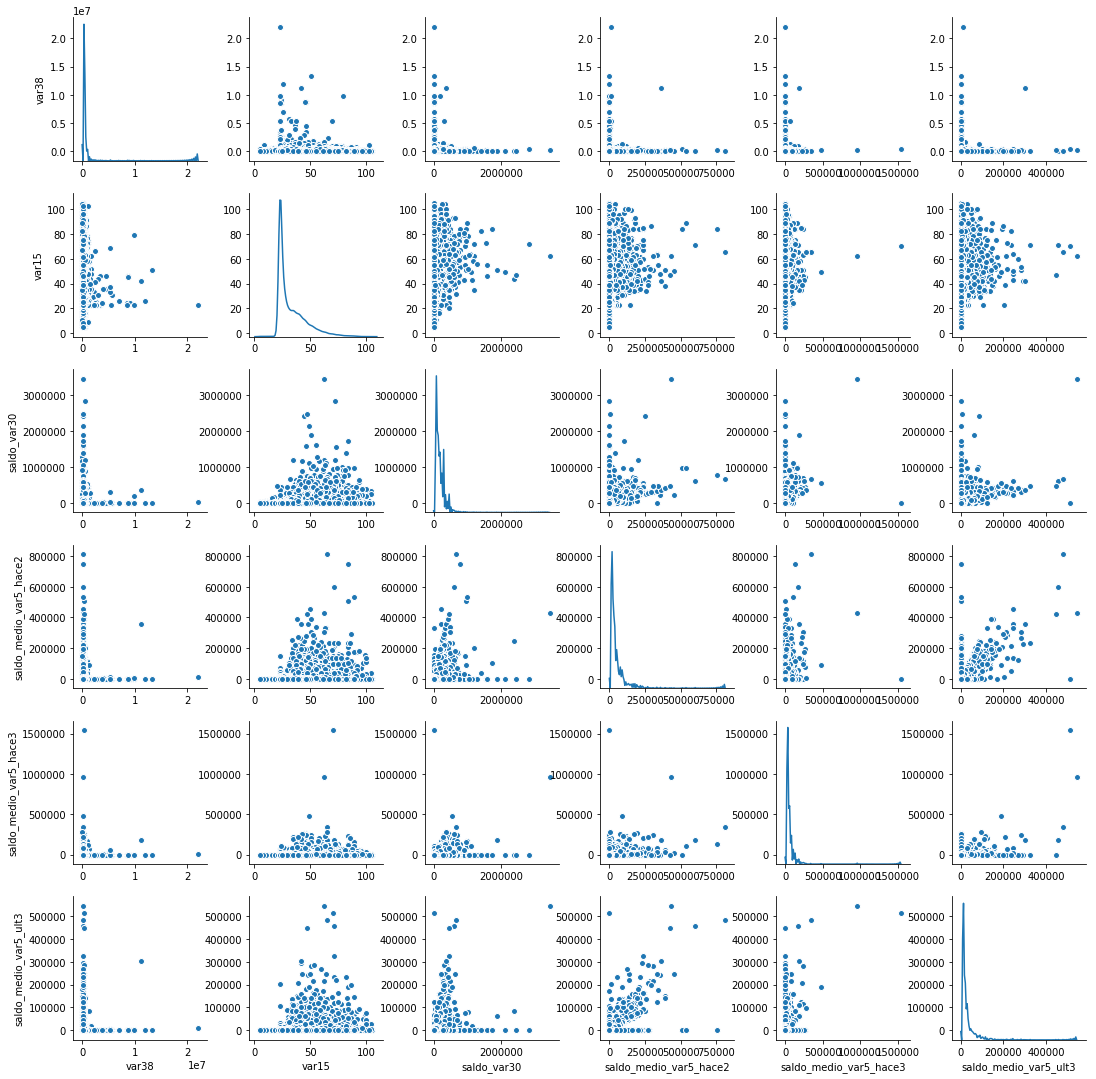

In [146]:
# Pairplot visualization of the top 6 features:

sns.pairplot(X_analysis, diag_kind="kde")

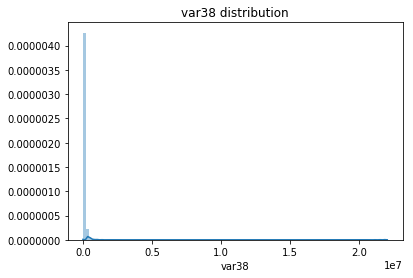

In [50]:
# Distribution plot of var38:

sns.distplot(X_analysis['var38'], bins= 100)
plt.xlabel("var38")
plt.title("var38 distribution")
plt.show()

In [68]:
# checking the most frequent value for var38 (peak):

X_analysis['var38'].value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
329603.970000        7
104644.410000        7
67088.310000         7
125722.440000        7
128318.520000        7
97639.560000         6
100466.730000        6
70813.800000         6
163432.470000        6
168733.620000        6
105260.880000        6
185385.690000        6
85814.040000         5
235476.720000        5
121603.020000        5
93037.680000         5
63820.890000         5
33184.020000         5
126065.040000        5
71302.530000         5
208961.790000        5
171932.700000        5
131353.470000        5
127141.500000        5
                 ...  
59680.710000         1
46170.180000         1
75729.810000         1
92730.750000         1
98087.700000         1
31312.410000         1
151944.720000        1
49222.200000         1
46682.640000         1
79753.740000         1
217717.530000        1
156462.240000        1
140446.5900

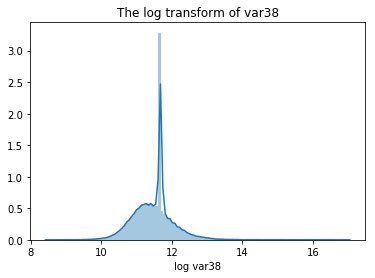

In [54]:
# the log distribution of var38:

fig = sns.distplot(np.log(X_analysis['var38']), bins= 120)
plt.xlabel("log var38")
plt.title("The log transform of var38")
plt.show(fig)

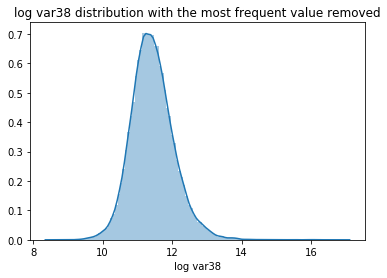

In [55]:
# var38 distribution with the most frequest value (117310.979016) removed; 

var38 = np.isclose(X_analysis['var38'],117310.979016)
X_analysis_var38 = X_analysis[~var38]

fig = sns.distplot(np.log(X_analysis_var38['var38']), bins= 120)
plt.xlabel("log var38")
plt.title("log var38 distribution with the most frequent value removed")
plt.show(fig)

In [58]:
# var38_freq_v is True when var38 has a value ~117310.97 & False otherwise
# var38_log calculates log-var38 when var38_freq_v is False & zero otherwise

X_imp['var38_freq_v'] = np.isclose(X_imp.var38, 117310.979016)
X_imp['var38_log'] = X_imp.loc[~X_imp['var38_freq_v'], 'var38'].map(np.log)
X_imp.loc[X_imp['var38_freq_v'], 'var38_log'] = 0


test = test[top_features.index]

test['var38_freq_v'] = np.isclose(test.var38, 117310.979016)
test['var38_log'] = test.loc[~test['var38_freq_v'], 'var38'].map(np.log)
test.loc[test['var38_freq_v'], 'var38_log'] = 0

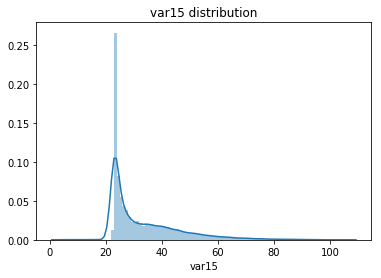

In [60]:
# distribution plot of var15:

sns.distplot(X_analysis['var15'], bins= 100)
plt.xlabel("var15")
plt.title("var15 distribution")
plt.show()

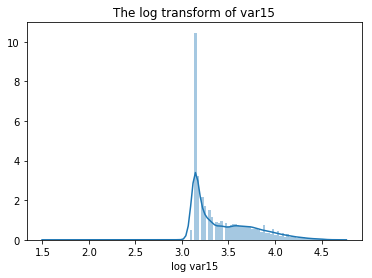

In [159]:
# distribution plot of log var15:

fig = sns.distplot(np.log(X_analysis['var15']), bins= 120)
plt.xlabel("log var15")
plt.title("The log transform of var15")
plt.show(fig)

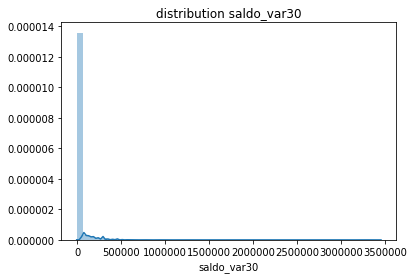

In [64]:
# notice the high frequency of zero value in the dirstribution:

sns.distplot(X_analysis['saldo_var30'], bins= 50)
plt.xlabel("saldo_var30")
plt.title("distribution saldo_var30")
plt.show()

In [161]:
# value count for saldo_var30:

X_analysis['saldo_var30'].value_counts()

0.00         20310
3.00         18290
90.00         5236
30.00         1603
15.00         1477
6.00           926
150.00         823
60.00          686
300.00         400
120.00         305
93.00          196
9.00           153
600.00         149
900.00         137
450.00         115
153.00         104
45.00           97
180.00          96
1500.00         92
3000.00         91
12.00           84
1.50            73
90000.00        71
0.30            68
303.00          65
150000.00       65
300000.00       65
60000.00        61
30000.00        59
750.00          58
             ...  
43794.12         1
2530.65          1
581.46           1
100649.43        1
257.85           1
900.30           1
2986.53          1
526.59           1
781.41           1
25526.58         1
1322.01          1
2121.24          1
572.58           1
9876.63          1
22650.00         1
28.29            1
4795.29          1
49985.49         1
2241.87          1
49418.70         1
408466.53        1
2167.26     

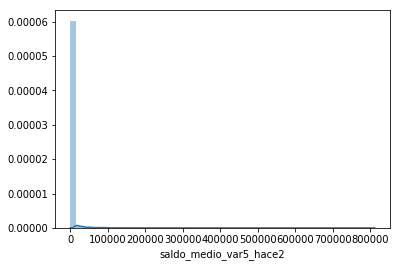

In [222]:
# distribution plot of saldo_medio_var5_hace2:

sns.distplot(X_analysis['saldo_medio_var5_hace2'], bins= 50)

In [223]:
# value count for saldo_medio_var5_hace2:

X_analysis['saldo_medio_var5_hace2'].value_counts()

0.00       23241
3.00       18220
90.00       5697
15.00       1513
30.00       1377
6.00         851
150.00       839
60.00        650
300.00       373
120.00       278
2.76         159
9.00         128
2.88         121
600.00       114
450.00       113
93.00         89
2.67          79
900.00        75
12.00         75
1.50          69
1500.00       66
0.30          63
45.00         60
3000.00       59
180.00        56
0.21          50
2.85          45
2.55          43
80.70         43
29.04         42
           ...  
365.37         1
122.31         1
57.51          1
1901.19        1
554.28         1
487.50         1
437.16         1
516.48         1
2820.00        1
9648.09        1
1704.24        1
5355.27        1
1173.54        1
909.66         1
6090.93        1
33.84          1
1776.45        1
41.16          1
290.76         1
695.22         1
212.25         1
236.82         1
2297.43        1
1029.15        1
4784.04        1
120.30         1
1523.70        1
7838.73       

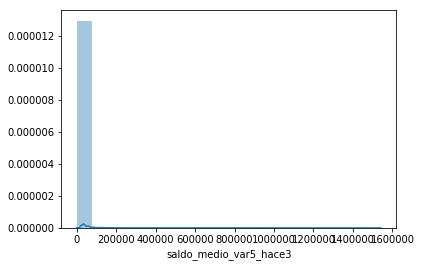

In [225]:
# distribution plot of saldo_medio_var5_hace3:

sns.distplot(X_analysis['saldo_medio_var5_hace3'], bins= 20)

In [226]:
# value count for saldo_medio_var5_hace3:

X_analysis['saldo_medio_var5_hace3'].value_counts()

0.00         29637
0.09           992
0.18           875
0.99           741
2.61           703
0.27           629
2.55           600
2.40           583
0.51           576
1.05           564
8.70           525
0.87           519
1.59           515
1.74           462
1.83           458
2.31           457
2.91           448
0.39           421
0.42           420
2.13           405
1.95           398
0.48           387
0.72           387
2.52           382
0.21           373
1.44           358
2.67           355
2.22           352
2.43           343
29.04          341
             ...  
301.74           1
969.63           1
461.40           1
57.39            1
45572.82         1
1195.29          1
770.01           1
340.02           1
289.56           1
153002.37        1
71.91            1
407.64           1
18355.02         1
39407.40         1
357.81           1
14.76            1
136.26           1
4725.00          1
4703.46          1
630.18           1
16272.39         1
615.60      

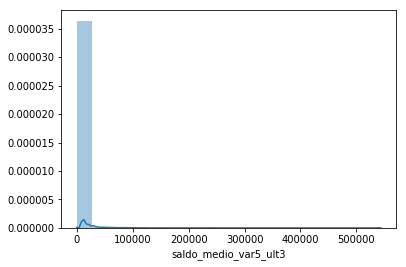

In [227]:
# distribution plot of saldo_medio_var5_ult3:

sns.distplot(X_analysis['saldo_medio_var5_ult3'], bins= 20)

In [229]:
# value count for saldo_medio_var5_ult3:

X_analysis['saldo_medio_var5_ult3'].value_counts()

0.00        24664
2.88         1104
2.34         1002
2.85          985
2.07          949
2.79          866
2.04          864
2.10          811
2.28          791
2.61          749
2.16          676
2.25          640
2.13          627
2.40          620
2.55          563
2.58          517
3.00          501
2.52          497
2.22          488
2.73          477
2.70          442
2.49          427
2.76          420
2.94          420
2.64          412
2.82          403
2.43          386
62.91         368
2.37          346
60.96         322
            ...  
2589.51         1
15291.24        1
6119.82         1
83.85           1
93.39           1
395.58          1
3374.25         1
440.16          1
1295.88         1
3983.34         1
203.43          1
138.57          1
216.18          1
2017.89         1
357.75          1
1013.82         1
2798.31         1
102.51          1
6771.21         1
582.51          1
1660.32         1
2873.73         1
2358.27         1
27625.11        1
7633.56   

In [11]:
# creating a zero count variable to count the number of zeros in each row:

X_imp['zeros'] = (X_imp == 0).astype(int).sum(axis=1)
test['zeros'] = (test == 0).astype(int).sum(axis=1)

## Implimentation:##

### RandomForestClassifier:### 

In [10]:
clf_RandomForest= RandomForestClassifier(max_depth=2, random_state=0)
clf_RandomForest.fit(X_imp, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
cv_score = cross_validation.cross_val_score(clf_RandomForest, X_imp, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.74208484259223761

In [75]:
submission_RandomForest = clf_RandomForest.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": submission_RandomForest[:,1]})
submission.to_csv("RandomForest.csv", index=False)

### QuadraticDiscriminantAnalysis:##

In [12]:
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_imp, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [13]:
cv_score = cross_validation.cross_val_score(clf_QDA, X_imp, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.73356436721763607

In [16]:
submission_QDA = clf_QDA.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": submission_QDA[:,1]})
submission.to_csv("QDA.csv", index=False)

### Xgboost:##

In [14]:
clf_XGB = XGBClassifier(
 learning_rate = 0.01,
 n_estimators = 1100,
 max_depth = 5,
 gamma = 0,
 min_child_weight=2,
 colsample_bytree=0.8,
 subsample=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=0)

clf_XGB.fit(X_imp,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=1100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [15]:
cv_score = cross_validation.cross_val_score(clf_XGB, X_imp, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.84045345209765421

In [46]:
submission_XGB = clf_XGB.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": submission_XGB[:,1]})
submission.to_csv("XGB.csv", index=False)

### GradientBoosting:### 

In [16]:
clf_GBoost= GradientBoostingClassifier(min_samples_split=500, min_samples_leaf=50, max_depth=8, max_features='sqrt', subsample=0.8, random_state=0)
clf_GBoost.fit(X_imp,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=0.8, verbose=0,
              warm_start=False)

In [17]:
cv_score = cross_validation.cross_val_score(clf_GBoost, X_imp, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.83730370432420831

In [18]:
submission_GBoost = clf_GBoost.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": submission_GBoost[:,1]})
submission.to_csv("GBoostr.csv", index=False)

## Refinement:## 

In [65]:
# GridSearch Function to be used for parameter tuning:

score_metric = 'roc_auc'

def model_params(train, test, clf, params):
    grid_obj = GridSearchCV(clf, params, scoring=score_metric, cv=3, n_jobs=-1)
    grid_fit = grid_obj.fit(train, test)
    best_clf = grid_fit.best_estimator_
    best_clf_params = grid_fit.best_params_
    return best_clf.__class__.__name__, grid_fit.grid_scores_, grid_fit.best_params_, grid_fit.best_score_

### GradientBoost tuning:###

In [12]:
GBoost_Params_1= {'n_estimators': range(40,120,10)}

clf_GBoost_1= GradientBoostingClassifier(
 min_samples_split=500, 
 min_samples_leaf=50,
 max_depth=8, 
 max_features='sqrt', 
 subsample=0.8, 
 random_state=0)

model_params(X_imp,y,clf_GBoost_1,GBoost_Params_1)

('GradientBoostingClassifier',
 [mean: 0.83827, std: 0.00744, params: {'n_estimators': 40},
  mean: 0.83835, std: 0.00724, params: {'n_estimators': 50},
  mean: 0.83852, std: 0.00723, params: {'n_estimators': 60},
  mean: 0.83816, std: 0.00646, params: {'n_estimators': 70},
  mean: 0.83773, std: 0.00679, params: {'n_estimators': 80},
  mean: 0.83757, std: 0.00684, params: {'n_estimators': 90},
  mean: 0.83730, std: 0.00682, params: {'n_estimators': 100},
  mean: 0.83698, std: 0.00695, params: {'n_estimators': 110}],
 {'n_estimators': 60},
 0.83852035656598922)

In [19]:
clf_GBoost_1= GradientBoostingClassifier(
 n_estimators= 60, 
 min_samples_split=500, 
 min_samples_leaf=50, 
 max_depth=8, 
 max_features='sqrt', 
 subsample=0.8, 
 random_state=0)

clf_GBoost_1.fit(X_imp,y)

subs = clf_GBoost_1.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("GradientBoosting_nestimators.csv", index=False)

In [17]:
GBoost_Params_2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}

clf_GBoost_2= GradientBoostingClassifier(
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features='sqrt', 
 subsample=0.8, 
 random_state=0)

model_params(X_imp,y,clf_GBoost_2, GBoost_Params_2)

('GradientBoostingClassifier',
 [mean: 0.83725, std: 0.00672, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.83730, std: 0.00750, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.83687, std: 0.00788, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.83672, std: 0.00782, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.83731, std: 0.00750, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83817, std: 0.00741, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.83687, std: 0.00731, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.83767, std: 0.00695, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.83820, std: 0.00618, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.83782, std: 0.00647, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.83760, std: 0.00680, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.83782, std: 0.00697, params: {'max_depth': 9

In [21]:
clf_GBoost_2= GradientBoostingClassifier(
 max_depth=9,
 min_samples_split=800,
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features='sqrt', 
 subsample=0.8, 
 random_state=0)

clf_GBoost_2.fit(X_imp,y)

subs = clf_GBoost_2.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("GradientBoosting_max_depth_min_samples_split.csv", index=False)

In [23]:
GBoost_Params_3 = {'min_samples_leaf':range(30,70,10)}

clf_GBoost_3 = GradientBoostingClassifier(
 n_estimators=60, 
 min_samples_split= 800, 
 max_depth= 9, 
 max_features='sqrt', 
 subsample=0.8, 
 random_state=0)

model_params(X_imp,y,clf_GBoost_3, GBoost_Params_3)

('GradientBoostingClassifier',
 [mean: 0.83840, std: 0.00683, params: {'min_samples_leaf': 30},
  mean: 0.83793, std: 0.00669, params: {'min_samples_leaf': 40},
  mean: 0.84031, std: 0.00680, params: {'min_samples_leaf': 50},
  mean: 0.83881, std: 0.00726, params: {'min_samples_leaf': 60}],
 {'min_samples_leaf': 50},
 0.84030797002294)

In [22]:
clf_GBoost_3= GradientBoostingClassifier(
 max_depth=9,
 min_samples_split=800,
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features='sqrt', 
 subsample=0.8, 
 random_state=0)

clf_GBoost_3.fit(X_imp,y)

subs = clf_GBoost_3.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("GradientBoosting_min_samples_leaf.csv", index=False)

In [37]:
GBoost_Params_4 = {'max_features':range(3,15,1)}

clf_GBoost_4 = GradientBoostingClassifier(
 n_estimators=60, 
 min_samples_split= 800, 
 min_samples_leaf= 50, 
 max_depth= 9, 
 subsample=0.8, 
 random_state=0)

model_params(X_imp,y,clf_GBoost_4, GBoost_Params_4)

('GradientBoostingClassifier',
 [mean: 0.83605, std: 0.00744, params: {'max_features': 3},
  mean: 0.83717, std: 0.00789, params: {'max_features': 4},
  mean: 0.83936, std: 0.00687, params: {'max_features': 5},
  mean: 0.83872, std: 0.00569, params: {'max_features': 6},
  mean: 0.84031, std: 0.00680, params: {'max_features': 7},
  mean: 0.83844, std: 0.00663, params: {'max_features': 8},
  mean: 0.83699, std: 0.00581, params: {'max_features': 9},
  mean: 0.83731, std: 0.00639, params: {'max_features': 10},
  mean: 0.83926, std: 0.00511, params: {'max_features': 11},
  mean: 0.83831, std: 0.00559, params: {'max_features': 12},
  mean: 0.83868, std: 0.00557, params: {'max_features': 13},
  mean: 0.83809, std: 0.00529, params: {'max_features': 14}],
 {'max_features': 7},
 0.84030797002294)

In [25]:
clf_GBoost_4= GradientBoostingClassifier(
 max_depth=9,
 min_samples_split=800,
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features=7, 
 subsample=0.8, 
 random_state=0)

clf_GBoost_4.fit(X_imp,y)

subs = clf_GBoost_4.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("GradientBoosting_max_features.csv", index=False)

In [26]:
GBoost_Params_5 = {'subsample':[i/10.0 for i in range(5,11)]}

clf_GBoost_5 = GradientBoostingClassifier(n_estimators=60, min_samples_split= 800, min_samples_leaf= 50, max_depth= 9, max_features=7, random_state=0)

model_params(X_imp,y,clf_GBoost_5, GBoost_Params_5)

('GradientBoostingClassifier',
 [mean: 0.83700, std: 0.00664, params: {'subsample': 0.5},
  mean: 0.83800, std: 0.00671, params: {'subsample': 0.6},
  mean: 0.83841, std: 0.00618, params: {'subsample': 0.7},
  mean: 0.84031, std: 0.00680, params: {'subsample': 0.8},
  mean: 0.83760, std: 0.00620, params: {'subsample': 0.9},
  mean: 0.83789, std: 0.00558, params: {'subsample': 1.0}],
 {'subsample': 0.8},
 0.84030797002294)

In [ ]:
clf_GBoost_5= GradientBoostingClassifier(
 max_depth=9,
 min_samples_split=800,
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features=7, 
 subsample=0.8, 
 random_state=0)

clf_GBoost_5.fit(X_imp,y)

subs = clf_GBoost_5.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("GradientBoosting_max_features.csv", index=False)

In [55]:
# CV score of tuned GradientBoostin algorithm:

clf_GBoost_tuned= GradientBoostingClassifier(
 learning_rate= 0.01, 
 n_estimators=60, 
 max_depth= 9, 
 min_samples_split = 800, 
 min_samples_leaf = 50, 
 max_features = 7,
 subsample = 0.8,
 random_state=0)

score = cross_validation.cross_val_score(clf_GBoost_tuned, X_imp, y, scoring=score_metric)
score.mean()

0.82861418514947516

In [29]:
clf_GBoost_tuned= GradientBoostingClassifier(
 learning_rate= 0.01, 
 max_depth=9,
 min_samples_split=800,
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features=7, 
 subsample=0.8, 
 random_state=0)

clf_GBoost_tuned.fit(X_imp,y)

subs = clf_GBoost_tuned.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("GradientBoosting_learning_rate.csv", index=False)

### Xgboost tuning:###

In [44]:
clf_XGB_1 = XGBClassifier(seed=0)

params_XGB_1 = {'max_depth':range(3,10,2)}

model_params(X_imp, y, clf_XGB_1, params_XGB_1)

('XGBClassifier',
 [mean: 0.83780, std: 0.00485, params: {'max_depth': 3},
  mean: 0.83882, std: 0.00579, params: {'max_depth': 5},
  mean: 0.83651, std: 0.00588, params: {'max_depth': 7},
  mean: 0.83069, std: 0.00485, params: {'max_depth': 9}],
 {'max_depth': 5},
 0.83881891140818821)

In [45]:
clf_XGB_1 = XGBClassifier(
 max_depth=5,
 seed=0)

clf_XGB_1.fit(X_imp,y)

subs = clf_XGB_1.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("XGB_max_depth.csv", index=False)

In [49]:
clf_XGB_2 = XGBClassifier(
 max_depth=5,
 seed=0)

params_XGB_2 = {'min_child_weight':range(2,8,2)}

model_params(X_imp, y, clf_XGB_2, params_XGB_2)

('XGBClassifier',
 [mean: 0.83902, std: 0.00640, params: {'min_child_weight': 2},
  mean: 0.83932, std: 0.00509, params: {'min_child_weight': 4},
  mean: 0.83890, std: 0.00558, params: {'min_child_weight': 6}],
 {'min_child_weight': 4},
 0.83932407411867083)

In [50]:
clf_XGB_2 = XGBClassifier(
 max_depth=5,
 min_child_weight=4,
 seed=0)

clf_XGB_2.fit(X_imp,y)

subs = clf_XGB_2.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("XGB_min_child_weight.csv", index=False)

In [51]:
clf_XGB_3 = XGBClassifier(max_depth = 5, min_child_weight = 4,  seed=0)

params_XGB_3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

model_params(X_imp, y, clf_XGB_3, params_XGB_3)

('XGBClassifier',
 [mean: 0.83932, std: 0.00509, params: {'gamma': 0.0},
  mean: 0.83897, std: 0.00567, params: {'gamma': 0.1},
  mean: 0.83915, std: 0.00530, params: {'gamma': 0.2},
  mean: 0.83901, std: 0.00598, params: {'gamma': 0.3},
  mean: 0.83875, std: 0.00586, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.83932407411867083)

In [53]:
clf_XGB_4 = XGBClassifier(max_depth = 5, min_child_weight = 4, gamma = 0.0, seed=0)

params_XGB_4 = {
 'colsample_bytree':[i/10.0 for i in range(4,8)]
}

model_params(X_imp, y, clf_XGB_4, params_XGB_4)

('XGBClassifier',
 [mean: 0.83926, std: 0.00545, params: {'colsample_bytree': 0.4},
  mean: 0.83915, std: 0.00621, params: {'colsample_bytree': 0.5},
  mean: 0.83936, std: 0.00544, params: {'colsample_bytree': 0.6},
  mean: 0.83920, std: 0.00502, params: {'colsample_bytree': 0.7}],
 {'colsample_bytree': 0.6},
 0.83935948765766122)

In [54]:
clf_XGB_4 = XGBClassifier(max_depth = 5, min_child_weight = 4, gamma = 0.0, colsample_bytree= 0.6, seed=0)

clf_XGB_4.fit(X_imp,y)

subs = clf_XGB_4.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("XGB_colsample_bytree.csv", index=False)

In [57]:
clf_XGB_5 =  XGBClassifier(max_depth = 5, min_child_weight = 4, gamma = 0.0, colsample_bytree= 0.6, seed=0)

params_XGB_5 = {
 'subsample':[i/10.0 for i in range(5,9)]
}

model_params(X_imp, y, clf_XGB_5, params_XGB_5)

('XGBClassifier',
 [mean: 0.83896, std: 0.00591, params: {'subsample': 0.5},
  mean: 0.83950, std: 0.00549, params: {'subsample': 0.6},
  mean: 0.83989, std: 0.00669, params: {'subsample': 0.7},
  mean: 0.83887, std: 0.00583, params: {'subsample': 0.8}],
 {'subsample': 0.7},
 0.83989258385977439)

In [58]:
clf_XGB_5 = XGBClassifier(max_depth = 5, min_child_weight = 4, gamma = 0.0, colsample_bytree= 0.6, subsample= 0.7 ,seed=0)

clf_XGB_5.fit(X_imp,y)

subs = clf_XGB_5.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("XGB_subsample.csv", index=False)

In [60]:
clf_XGB_6 = XGBClassifier(
 learning_rate= 0.01, 
 n_estimators = 1100, 
 max_depth = 5, 
 min_child_weight = 4, 
 gamma = 0.0, 
 seed=0, 
 colsample_bytree = 0.6, 
 subsample = 0.7)

cv_score = cross_validation.cross_val_score(clf_XGB_6, X_imp, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.84100709109567973

In [61]:
clf_XGB_6.fit(X_imp,y)

subs = clf_XGB_6.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("XGB_nestimators_lrate.csv", index=False)

### Ensemble model 1:###

In [12]:
clf_GBoost= GradientBoostingClassifier(
 learning_rate= 0.01,
 max_depth=9,
 min_samples_split=800,
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features=7, 
 subsample=0.8, 
 random_state=0)

clf_XGB = XGBClassifier(
 learning_rate = 0.01,
 n_estimators = 1100,
 max_depth = 5,
 gamma = 0,
 min_child_weight=4,
 colsample_bytree=0.6,
 subsample=0.7,
 nthread=4,
 objective= 'binary:logistic',
 seed=0)

In [13]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

estimators = []

estimators.append(('clf_GBoost', clf_GBoost))

estimators.append(('clf_XGB', clf_XGB))

ensemble = VotingClassifier(estimators, voting='soft')

In [14]:
ensemble.fit(X_imp,y)

VotingClassifier(estimators=[('clf_GBoost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=9,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_le...gistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.7))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [15]:
subs = ensemble.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("ensemble_tuned_firstrun.csv", index=False)

In [16]:
cv_score = cross_validation.cross_val_score(ensemble, X_imp, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.8403652622975879

### Ensemble model 2:###

In [17]:
clf_GBoost= GradientBoostingClassifier(
 learning_rate= 0.01,
 max_depth=9,
 min_samples_split=800,
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features=7, 
 subsample=0.8, 
 random_state=0)

clf_XGB = XGBClassifier(
 learning_rate = 0.01,
 n_estimators = 1100,
 max_depth = 5,
 gamma = 0,
 min_child_weight=4,
 colsample_bytree=0.6,
 subsample=0.7,
 nthread=4,
 objective= 'binary:logistic',
 seed=0)

clf_XGB_2 =  XGBClassifier(
 learning_rate = 0.01,
 n_estimators = 1100,
 max_depth = 6,
 gamma = 0.2,
 min_child_weight=4,
 colsample_bytree=0.8,
 subsample=0.8,
 objective= 'binary:logistic',
 nthread=4,
 seed=0)

from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

estimators = []

estimators.append(('clf_GBoost', clf_GBoost))

estimators.append(('clf_XG1', clf_XGB))

estimators.append(('clf_XG2', clf_XGB_2))

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X_imp,y)

subs = ensemble.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("ensemble_run2.csv", index=False)

cv_score = cross_validation.cross_val_score(ensemble, X_imp, y, scoring='roc_auc', n_jobs=-1)
cv_score.mean()

0.8408449032094093

### Ensemble model 3 (final):###

In [34]:
clf_GBoost= GradientBoostingClassifier(
 max_depth=9,
 min_samples_split=800,
 n_estimators=60, 
 min_samples_leaf=50, 
 max_features=7, 
 subsample=0.8, 
 random_state=0)

clf_XG1 = XGBClassifier(
 learning_rate = 0.01,
 n_estimators = 1100,
 max_depth = 5,
 gamma = 0,
 min_child_weight=2,
 colsample_bytree=0.8,
 subsample=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=0)

clf_XG2 =  XGBClassifier(
 learning_rate = 0.01,
 n_estimators = 1100,
 max_depth = 6,
 gamma = 0.2,
 min_child_weight=4,
 colsample_bytree=0.8,
 subsample=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=0)

In [35]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

estimators = []

estimators.append(('clf_GBoost', clf_GBoost))

estimators.append(('clf_XG1', clf_XG1))

estimators.append(('clf_XG2', clf_XG2))

ensemble = VotingClassifier(estimators, voting='soft')

In [36]:
ensemble.fit(X_imp,y)

VotingClassifier(estimators=[('clf_GBoost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_lea...gistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [37]:
subs = ensemble.predict_proba(test)
submission = pd.DataFrame({"ID":test_ID, "TARGET": subs[:,1]})
submission.to_csv("ensemble_run6.csv", index=False)

In [39]:
cv_score = cross_validation.cross_val_score(ensemble, X_imp, y, scoring='roc_auc')
cv_score.mean()

0.84157079590517103